# Part B-Normalizing_Data

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

In [36]:
Concrete_data = pd.read_csv("data/concrete_data.csv")

In [37]:
Concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [54]:
Concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [38]:
Concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [39]:
#Checking null Values
Concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<Axes: >

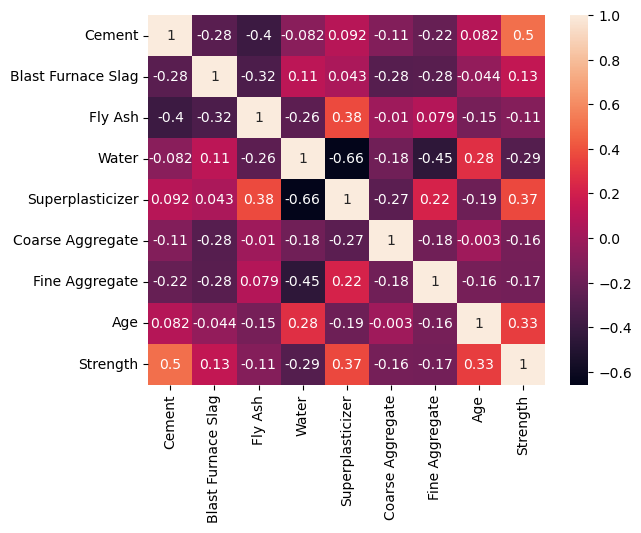

In [40]:
#Corr heatmap to check correlation
sns.heatmap(Concrete_data.corr(), annot=True)

In [44]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
#function to make model with 1 hidden layer having 10 nodes
def build_model():
    model = Sequential()
    model.add(Input(Concrete_data.drop("Strength",axis = 1).shape[1:],))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [56]:
from sklearn.preprocessing import StandardScaler

# Normalzing Data
### StandardScaler has been used as it subtract data from its mean and divide by Standard Deviation
- After normalizing std of features became 1
- Mean became 0

In [59]:
Scaler = StandardScaler()
Normalized_Data = Scaler.fit_transform(Concrete_data.drop('Strength', axis = 1))

### By normalizing Data less computational power is used as all the values are between -3 and 3

In [60]:
Normalized_mse = []
model_2 = build_model()
for _ in range(50):
    x_train, x_test, y_train, y_test = train_test_split(Normalized_Data, Concrete_data['Strength'], test_size = 0.3)
    #model with 50 epochs
    model_2.fit(x_train, y_train, epochs = 50)
    y_pred = model_2.predict(x_test)
    Normalized_mse.append(mean_squared_error(y_test, y_pred))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1529.5378   
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1619.5803 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1524.8866 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1505.2556 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1513.5798 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1493.6238 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1406.5566 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1372.5594 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1436.7885 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1361.8176 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1353.2816 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1329.2064 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1335.7343 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1245.9517 
Epoch 15/50
23/23 ━━━━━━━━━

## Comparison from Part A
1. Mean of mean squared errors has been reduced to 52.33 from 75.16
2. STD is increased from 45.12 to 62.16
3. Less computational Power is used.

In [61]:
Normalized_mse = np.array(Normalized_mse)
print("After normalization of Data:")
print(f"Mean is :{Normalized_mse.mean()}")
print(f"Standard Deviation is: {Normalized_mse.std()}")
print(Normalized_mse)

After normalization of Data:
Mean is :52.3333242165329
Standard Deviation is: 62.16366177727631
[459.86443549 154.30888369 118.63423532  74.8407384   76.20939325
  65.40550597  63.50752968  54.19772132  44.74209469  50.63072664
  43.02579923  43.50061178  43.80274491  40.33435556  42.26539138
  38.41745436  40.37658208  39.76856888  36.51847622  42.38444367
  35.71068922  34.8934831   30.94672142  36.97373023  34.23467525
  32.81994466  35.33657219  35.62613217  41.39604908  32.64568129
  37.66581051  38.44264802  35.23821918  32.85837361  31.26889148
  38.24211425  31.66497242  28.46234806  27.75625489  33.21411235
  32.73246589  37.26027988  39.48471989  40.71011893  29.55046456
  31.88263902  36.62941706  36.10088519  35.16036525  39.02173929]
